# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## InceptionResNetV2

In [5]:
base_model_inception = InceptionResNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

219062272/219055592 [==============================] - 3s 0us/step


In [6]:
for layer in base_model_inception.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_inception.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_inception.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 242s 2s/step - loss: 0.6005 - accuracy: 0.8020 - val_loss: 0.1113 - val_accuracy: 0.9692
Epoch 2/100
114/114 [==============================] - 161s 1s/step - loss: 0.1018 - accuracy: 0.9608 - val_loss: 0.1386 - val_accuracy: 0.9604
Epoch 3/100
114/114 [==============================] - 161s 1s/step - loss: 0.0923 - accuracy: 0.9685 - val_loss: 0.1151 - val_accuracy: 0.9714
Epoch 4/100
114/114 [==============================] - 161s 1s/step - loss: 0.0898 - accuracy: 0.9682 - val_loss: 0.0992 - val_accuracy: 0.9758
Epoch 5/100
114/114 [==============================] - 161s 1s/step - loss: 0.0686 - accuracy: 0.9748 - val_loss: 0.1207 - val_accuracy: 0.9736
Epoch 6/100
114/114 [==============================] - 161s 1s/step - loss: 0.0511 - accuracy: 0.9795 - val_loss: 0.1244 - val_accuracy: 0.9736
Epoch 7/100
114/114 [==============================] - 162s 1s/step - loss: 0.0486 - accuracy: 0.9833 - val_loss: 0.0821 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 36s 2s/step - loss: 0.1670 - accuracy: 0.9582
test loss, test acc: [0.16701601445674896, 0.9582417607307434]


## Plotting 

In [12]:
history.history

{'loss': [0.27499037981033325,
  0.09676831215620041,
  0.08773523569107056,
  0.07248381525278091,
  0.05906703695654869,
  0.06051667034626007,
  0.04708295315504074,
  0.04515871778130531,
  0.05165191367268562,
  0.06343299895524979,
  0.04072362557053566,
  0.046621765941381454,
  0.04276334121823311,
  0.03614949434995651,
  0.040999382734298706,
  0.042655136436223984,
  0.030183425173163414,
  0.04419923201203346,
  0.04095746949315071,
  0.03541327640414238,
  0.03246046602725983,
  0.04340048506855965,
  0.04141223803162575,
  0.02182086370885372,
  0.032541703432798386,
  0.039556559175252914,
  0.02994440123438835,
  0.03897947818040848,
  0.04215094819664955,
  0.03183479234576225,
  0.029734736308455467,
  0.023567264899611473,
  0.023555241525173187,
  0.016355501487851143,
  0.020448870956897736,
  0.020501069724559784,
  0.07130268216133118,
  0.027942748740315437,
  0.03694906085729599,
  0.023543652147054672,
  0.03804192692041397,
  0.038893602788448334,
  0.0327322

### Accuracy vs Epochs

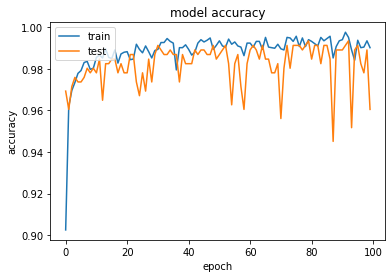

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

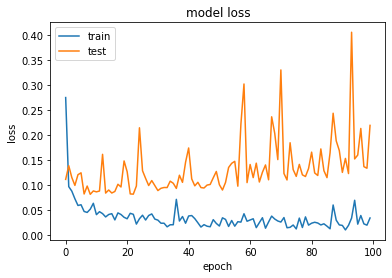

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()